In [ ]:
import numpy as np
import re
from io import StringIO

class Machine():
    def __init__(self):    
        self.lights = []
        self.buttons = []
        self.yoltages = []

    def __repr__(self):
        return f"L: {self.lights} \nB: {np.array(self.buttons)} \nY: {self.yoltages} \n ---------------"
    
pattern = re.compile(r"^\[([.#]+)\]\s*((?:\([^()]+\)\s*)+)\{([^}]+)\}$")
pattern_buttons = re.compile(r"\(([^()]+)\)")
pattern_digits = re.compile(r"\d+")

with open("10/input.txt") as inpt:
    machines = []
    for line in inpt.readlines():
        match = pattern.match(line.strip()).groups()
        machine = Machine()
        
        # [0 if ch == "." else 1 for ch in match[0]]
        machine.lights = np.fromiter(((ch == "#") for ch in match[0]), int)
        for but in pattern_buttons.findall(match[1].strip()):
            arr = np.zeros(len(match[0]), dtype=int)
            arr[np.fromiter((int(n) for n in pattern_digits.findall(but)), int)] = 1
            machine.buttons.append(arr)
        
        machine.yoltages = np.fromiter((int(n) for n in pattern_digits.findall(match[2])), int)
        print(machine)
        
a = np.array(([0, 1, 0, 1], [0, 0, 1, 1]))

np.bitwise_xor(a, a)

[0 1 1 0] 
 [[0 0 0 1]
 [0 1 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [1 0 1 0]
 [1 1 0 0]] 
 [3 5 4 7] 
 ---------------
[0 0 0 1 0] 
 [[1 0 1 1 1]
 [0 0 1 1 0]
 [1 0 0 0 1]
 [1 1 1 0 0]
 [0 1 1 1 1]] 
 [ 7  5 12  7  2] 
 ---------------
[0 1 1 1 0 1] 
 [[1 1 1 1 1 0]
 [1 0 0 1 1 0]
 [1 1 1 0 1 1]
 [0 1 1 0 0 0]] 
 [10 11 11  5 10  5] 
 ---------------


array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def plotgraph(G):
    start = "svr"
    end   = "out"
    highlight = {"dac", "fft", "you", start, end}   # set of nodes to emphasize


    # 1. Distance from start defines layers
    dist = nx.single_source_shortest_path_length(G, start)

    # Nodes unreachable from start get dumped into a separate "infinity" layer
    layers = defaultdict(list)
    for n in G.nodes:
        layer = dist.get(n, float("inf"))
        layers[layer].append(n)

    # Sort layers by layer number
    sorted_layers = sorted(layers.items(), key=lambda x: x[0])

    # 2. Assign positions
    pos = {}
    layer_y_gap = 1.5
    node_x_gap = 1.5

    for i, (layer_num, nodes_in_layer) in enumerate(sorted_layers):
        y = -i * layer_y_gap  # same y for entire layer

        # horizontally center this layer
        # (spread nodes out symmetrically around 0)
        for j, n in enumerate(nodes_in_layer):
            x = (j - (len(nodes_in_layer)-1)/2) * node_x_gap
            pos[n] = (x, y)

    # 3. Highlighting
    node_colors = ["red" if n in highlight else "lightblue" for n in G.nodes]

    # 4. Draw
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=300,
        arrows=True
    )

    plt.show()

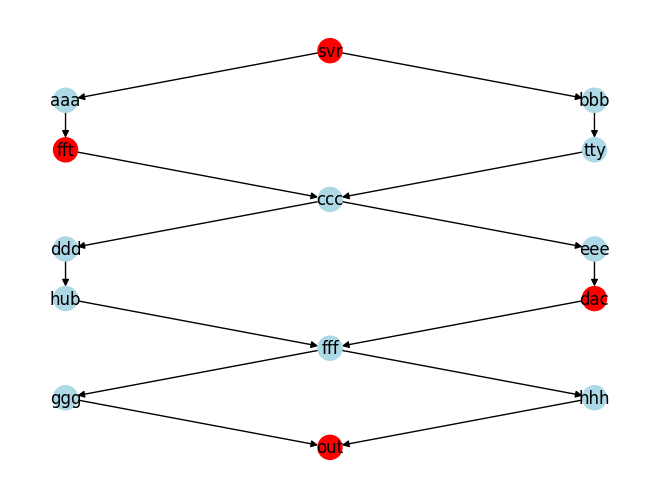

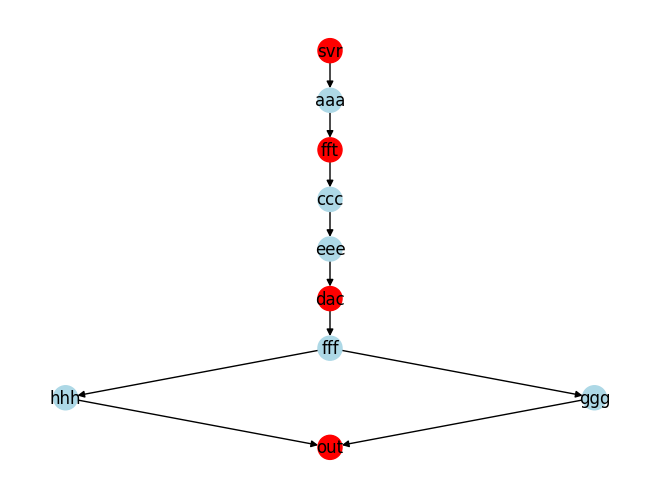

In [21]:
import networkx as nx
import re
import matplotlib.pyplot as plt


with open("11/input.txt") as inpt:
    arr = []
    for start, ends in re.findall(r"^(\S+):\s*(.+)$", inpt.read(), re.MULTILINE):
        for e in ends.split(" "):
            arr.append([start, e])

G = nx.DiGraph()
G.add_edges_from(arr)

# pos = nx.bfs_layout(G, "you")
# nx.draw(G, with_labels=True, font_color="White", node_color="black")

plotgraph(G)

start, p2, p3, end = "svr", "fft", "dac", "out"

a = set(nx.descendants(G, start)) | {start}
b = set(nx.ancestors(G, p2)) | {p2}
sg_svr2fft = G.subgraph(a & b)

a = set(nx.descendants(G, p2)) | {p2}
b = set(nx.ancestors(G, p3)) | {p3}
sg_fft2dac = G.subgraph(a & b)

a = set(nx.descendants(G, p3)) | {p3}
b = set(nx.ancestors(G, end)) | {end}
sg_dac2out = G.subgraph(a & b)

G2 = nx.compose_all([sg_svr2fft, sg_fft2dac, sg_dac2out])


plotgraph(G2)

# len(list(nx.all_simple_paths(G, "svr", "out")))
# sum(list(nx.all_simple_paths(G, "you", "out")))